## Introduction

This notebook uses the Python programming language to implement a one-dimensional cellular automata. 

#### the main idea

This is a one-dimensional cellular automata with a number of cells = ncells. Maybe this is 1000 across. Notice in the code below it says 'ncells = 1000' (unless you change it!) This is a programming variable or as I like to say a bucket. The label on the bucket is 'ncells' and inside the bucket is the number 1000.

In a row of cells we say a particular cell is at position n. The cell to the left is at n - 1. The cell to the right is at n + 1. The three cells in a row are then L M R for Left Middle Right. Hence the middle cell, 'M', is at position n.

Below we give a rule, where it says 'Here is the rule!' The rule looks at cells L, M, and R and gives a new result at n (which is the middle cell M). This rule must be repeated across the entire row of cells; so we loop over space. When we get to the ends we don't have a L or an R... unless we assume the cells wrap around. Then when we need an L at cell n = 0 we just look at the very far end to cell (ncells - 1).

You can change the rule by changing the sequence of ones and zeros in the parentheses. Then run the CA and see what your rule produces.

Populating the interactive namespace from numpy and matplotlib
501718
[1120801, 125235, 126890, 125356, 125235, 127011, 125356, 124116]
[0, 1, 1, 1, 1, 0, 0, 0]


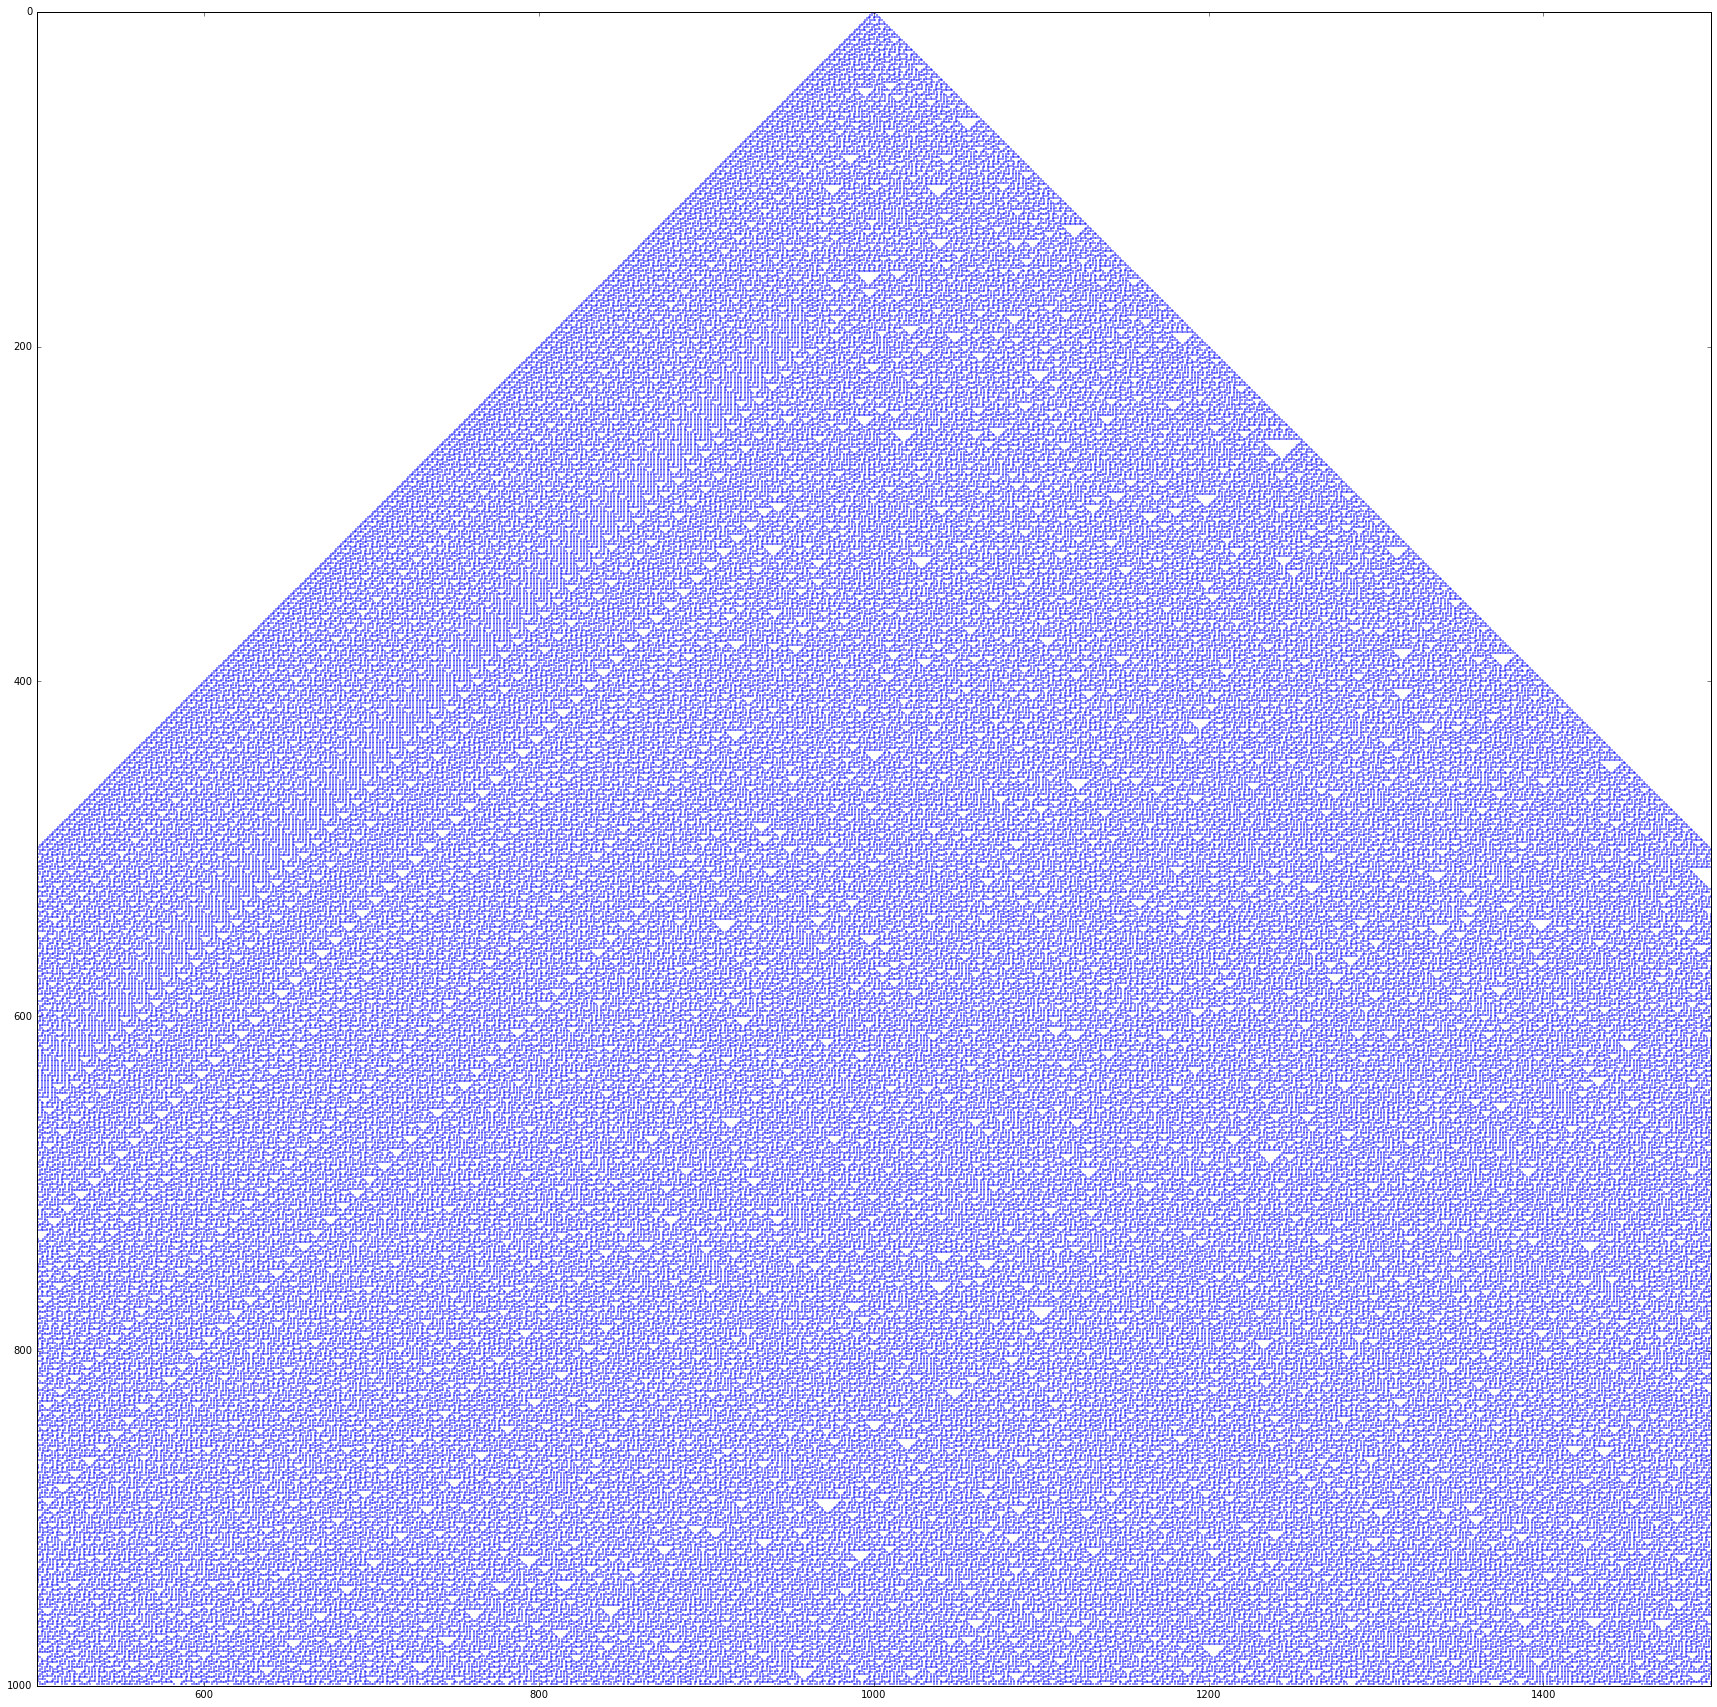

In [51]:
import numpy as np
import random as r

%pylab inline

ncells = 2000
ngens = 1000

rule = []

# Here is the rule!
# The result based on...
#           v       L M R
rule.append(0)    # 0 0 0
rule.append(1)    # 0 0 1
rule.append(1)    # 0 1 0
rule.append(0)    # 0 1 1
rule.append(0)    # 1 0 0
rule.append(1)    # 1 0 1
rule.append(1)    # 1 1 0
rule.append(0)    # 1 1 1

def RuleFromInteger(i):
    global rule
    rule[7] = i/128
    i -= rule[7]*128
    rule[6] = i/64
    i -= rule[6]*64
    rule[5] = i/32
    i -= rule[5]*32
    rule[4] = i/16
    i -= rule[4]*16
    rule[3] = i/8
    i -= rule[3]*8
    rule[2] = i/4
    i -= rule[2]*4
    rule[1] = i/2
    i -= rule[1]*2
    rule[0] = i

RuleFromInteger(30)
    
ca0 = [0]*ncells
ca1 = [0]*ncells

randomPattern = False

if randomPattern:
    for i in range(ncells):
        ca0[i] = r.randint(0,1)
else:
    ca0[ncells/2] = 1

x=[]
y=[]

count = [0, 0, 0, 0, 0, 0, 0, 0]

for time in range(ngens):
    for space in range(ncells):
        if ca0[space] == 1: 
            x.append(space)
            y.append(time)
        if space == 0:
            ruleIndex = ca0[ncells - 1]*4 + ca0[0]*2 + ca0[1]
        elif space == ncells - 1:
            ruleIndex = ca0[ncells - 2]*4 + ca0[ncells - 1]*2 + ca0[0]
        else:
            ruleIndex = ca0[space-1]*4 + ca0[space]*2 + ca0[space+1]
        ca1[space] = rule[ruleIndex]
        count[ruleIndex] += 1
    for space in range(ncells):
        ca0[space] = ca1[space]

print len(x)
print count
print rule

figdim = 30
plt.figure(figsize=(figdim, figdim))

# zooming in and out on scatter plots is a bit of a 'regular Python' matplotlib thing.
# zooming here in a Jupyter notebook is a bit trickier
# a high density plot has dimensions 600 x 600 or so and the marker specs work fine like this:
# but to zoom in (say to 200 x 200) we need to modify the s value and possibly the marker string
# This page has marker symbols: http://matplotlib.org/api/markers_api.html
# The boolean 'fullplot' chooses which of these two options are used.
fullplot = True
if fullplot:
    plt.scatter(x,y,s=1, marker='.',color='b')
    plt.xlim([500., 1500.])
    plt.ylim([0., 1000.])
else:
    plt.scatter(x,y,s=49, marker='s',color='g')
    plt.xlim([1400., 1600.])
    plt.ylim([800., 1000.])

# by flipping the y axis we have time increasing from top to bottom
plt.gca().invert_yaxis()

/home/ubuntu/Notebooks


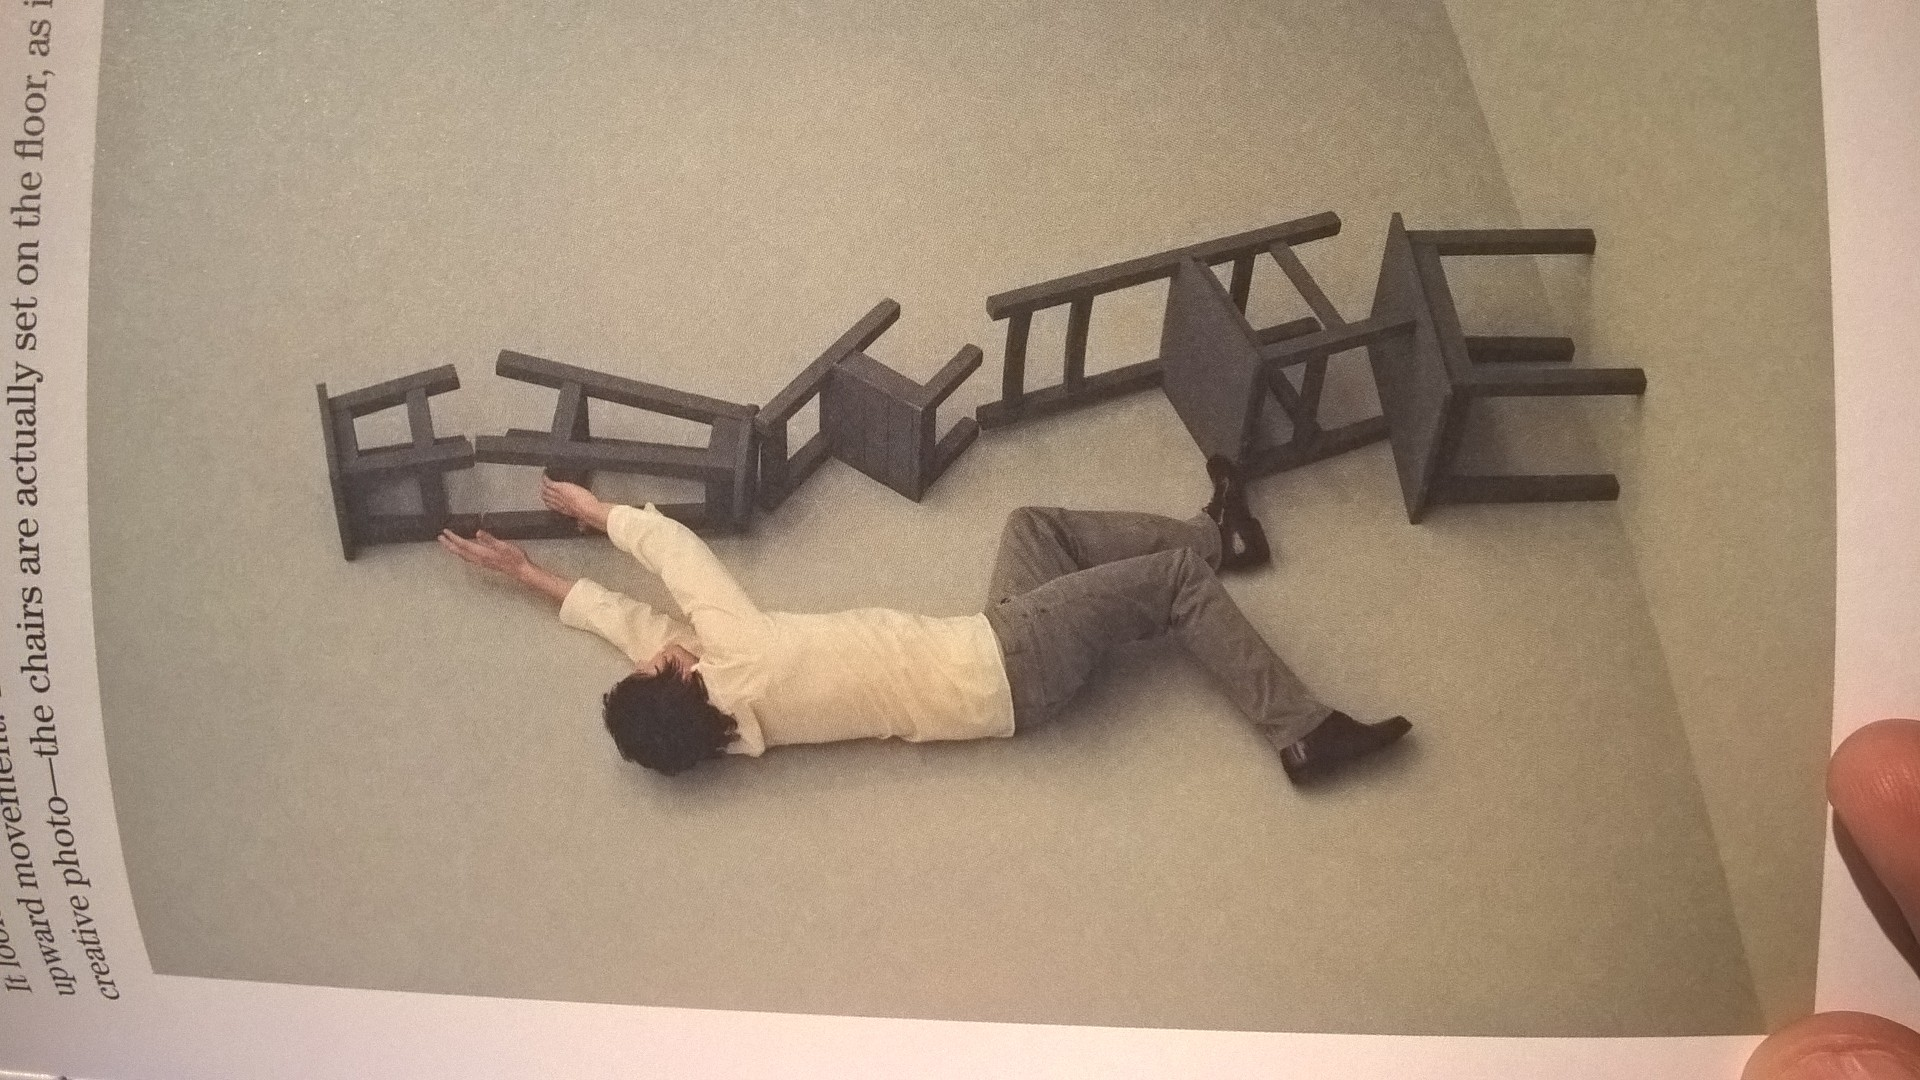

In [50]:
import os
print os.getcwd()

from IPython.display import Image 
droplet_diagram = Image(filename='images/chairs.jpg')
droplet_diagram